## Import Libaries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sbn
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,classification_report
from scipy.stats import pearsonr,spearmanr,kendalltau

In [2]:
dataset = pd.read_csv("dataset.csv")
pd.options.display.max_columns = None

In [3]:
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,major
0,5,5,3,5,5,5,5,3,4,5,5,5,3,5,5,7070,7469,7383,6540,9098,4998,6971,4713,6032,5878,4031,4386,9077,5113,4204,11,95,142,5,3,6,2,6,6,7,2,7,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3,0,1,2,28,1,2,1,5,2,1,1,ACTING
1,5,5,5,5,5,3,5,5,1,4,4,5,4,4,5,4086,13107,2807,5030,7405,7864,16234,2603,14174,9423,11683,12718,4816,6806,4823,6,125,144,6,7,6,7,6,3,7,5,1,1,1,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,2,2,1,14,1,1,2,4,2,1,1,NaN
2,2,4,1,2,2,2,4,2,2,4,2,4,0,2,4,27535,7814,7762,10290,8558,10538,4740,4162,6492,11512,6874,11440,0,11418,9872,7,141,90,6,6,6,1,7,5,6,5,7,7,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,4,2,2,2,26,1,1,1,4,1,1,2,philosophy
3,5,4,1,2,4,5,4,1,4,5,5,5,1,4,5,4561,5589,3506,3784,5093,3555,3158,1887,7678,2304,3604,2724,2689,2657,3824,5,58,135,6,7,7,5,7,6,5,1,5,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,0,1,3,1,1,1,25,1,12,1,4,1,1,3,history
4,5,4,1,4,4,5,4,3,1,5,5,5,3,5,5,8841,7575,3832,7775,4160,5216,7559,5792,10296,5455,3864,11799,7872,10543,4224,4,105,210,1,3,7,2,6,4,5,5,5,3,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,2,1,1,37,1,2,2,4,2,2,2,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,5,2,2,2,4,4,2,2,1,4,5,4,2,2,5,50238,6560,6208,4037,4273,4290,3680,2830,2100,3554,2610,7033,3800,4660,3936,1,116,63,3,5,5,3,7,5,5,5,3,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,3,3,1,1,32,1,2,1,4,2,1,3,English
2491,1,1,1,1,1,3,1,1,1,1,2,1,1,1,3,5715,6350,2032,5553,1911,9704,5007,2329,1544,2216,3928,424,4248,10208,3048,13,68,111,5,5,6,7,6,3,5,2,3,2,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,4,2,2,2,25,2,2,1,4,1,1,2,psychology
2492,5,5,1,5,5,5,5,1,3,1,1,5,5,5,5,6653,9447,6337,4856,4408,4391,6471,3625,7999,11593,5768,8207,6089,5864,5952,4,100,225,4,2,6,4,7,4,7,4,6,1,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,2,3,2,2,34,1,12,2,5,0,2,2,NaN
2493,2,1,4,1,1,1,1,3,1,2,1,1,1,1,4,11728,19822,15605,1507,7669,8903,7964,6918,3832,9024,3874,6608,22332,4574,7581,190,139,133,1,6,7,1,7,7,3,3,7,2,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1,2,2,1,2,19,1,1,1,4,1,1,2,NaN


In [4]:
dataset.dtypes.value_counts() #In our dataset has 1 object value which is major

int64     71
object     1
dtype: int64

## Descriptive Statistics

In [5]:
dataset.describe().style.background_gradient() #This is the table for metrics in features.
#As we see in this table, age has outliers so we can remove it in the next steps.

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,3.472545,2.963527,2.046894,2.636072,3.254108,3.108617,2.666934,2.450501,2.232866,3.502204,3.265331,2.644890,2.103006,2.955912,4.227655,44419.904609,51506.462926,6663.946693,22867.937074,7548.478557,8060.431663,8209.944689,4762.673747,6599.963126,9222.479760,8850.744289,11173.002405,6547.332665,7660.725451,7665.187976,850.004008,288.237675,298.517034,3.483367,4.373547,4.777555,4.333467,5.630060,5.024048,4.967936,4.030461,4.364329,2.537475,0.972345,0.941884,0.549098,0.975551,0.952705,0.104609,0.272545,0.453307,0.059319,0.967134,0.313427,0.167134,0.788377,0.926253,0.970741,0.982766,2.323046,2.119439,1.557515,1.242084,43.365531,1.182365,4.180361,1.662525,3.844489,1.662926,1.262124,2.560321
std,1.455552,1.494669,1.387236,1.451371,1.471855,1.506676,1.509954,1.569256,1.419266,1.388713,1.400302,1.504787,1.382461,1.489222,1.104538,1354595.168149,1614006.107035,10890.202483,656245.865390,9892.172182,9338.071912,36656.928544,7820.863912,11945.745740,18519.041061,15473.033589,100152.019552,6090.033961,7594.379339,23886.001809,8176.969673,3452.492990,2964.644784,1.986629,1.863189,1.763883,2.043292,1.414999,1.834639,1.756810,1.919562,1.933313,1.645660,0.164016,0.234010,0.497683,0.154469,0.212311,0.306111,0.445358,0.497915,0.236267,0.178321,0.463979,0.373170,0.408541,0.261412,0.168564,0.130170,0.947208,0.762074,0.596534,0.435854,684.593489,0.496186,3.697397,1.170653,0.924942,0.491924,0.559446,2.355926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,415.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,5912.500000,5779.500000,3524.000000,4087.500000,4167.500000,4497.500000,4233.000000,2580.500000,3473.500000,4794.000000,4695.500000,4835.500000,3789.000000,4439.500000,3782.500000,3.000000,81.000000,105.000000,2.000000,3.000000,3.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000
50%,4.000000

In [6]:
dataset.corr().style.background_gradient() #This table is for relationship between features.

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
Q1,1.000000,0.525999,0.355393,0.524432,0.481075,0.631313,0.472271,0.390206,0.417972,0.435786,0.643514,0.522403,0.380501,0.534578,0.505182,-0.034555,0.023143,0.062004,0.009566,0.004491,0.007027,0.039613,0.045035,0.071107,-0.004161,-0.036331,0.007219,0.095880,0.050715,-0.017736,-0.000550,0.007579,0.034498,0.030521,0.101511,-0.022292,0.052692,0.044807,-0.001404,0.001851,0.061434,-0.061204,-0.067573,-0.030894,-0.002921,-0.063314,-0.025278,-0.036641,0.057293,-0.112160,-0.058893,0.051375,-0.043643,-0.100652,0.047206,-0.046860,-0.005323,0.002444,-0.028951,-0.072087,0.001512,0.033105,-0.017328,0.014560,0.003327,0.115955,0.023033,-0.003470,0.042789,0.000963,0.005540
Q2,0.525999,1.000000,0.395511,0.534886,0.457498,0.551396,0.672219,0.376769,0.486181,0.380493,0.520726,0.715885,0.400196,0.500234,0.399456,-0.014342,0.010325,0.034892,0.017544,0.018408,-0.004503,0.015203,0.065191,0.073587,0.021454,-0.034489,-0.009462,0.113986,0.033250,-0.028110,-0.016388,-0.008907,0.023624,0.065219,0.083651,0.052889,-0.005337,0.051631,-0.036820,0.006273,-0.034131,0.022361,-0.094561,-0.056455,-0.064527,-0.057693,-0.050754,-0.061033,0.067058,-0.055536,-0.070983,0.029973,-0.018039,-0.115333,0.031781,-0.084218,-0.025359,-0.018560,-0.011476,0.017672,0.038324,0.016519,0.055412,0.024227,0.011675,0.153772,-0.038432,-0.015416,0.006722,0.068980,0.053402
Q3,0.355393,0.395511,1.000000,0.499378,0.398892,0.400229,0.423226,0.783954,0.490548,0.320991,0.341806,0.438428,0.711887,0.431483,0.265440,-0.013814,0.041252,0.061000,0.005630,-0.026719,0.006224,0.045055,0.030519,0.042721,-0.001918,-0.048217,-0.000085,0.096641,0.006714,-0.011320,0.004860,0.024304,-0.006062,0.037311,0.034485,0.010328,0.079779,0.015786,-0.010053,0.034345,0.000517,-0.062885,-0.076030,-0.080648,-0.120057,-0.114553,-0.075107,-0.059175,0.027157,-0.134270,-0.184038,0.055124,-0.063465,-0.172353,0.036748,-0.196143,-0.077808,-0.043856,-0.037711,-0.132066,0.062970,0.143793,-0.054593,0.038108,0.039415,0.168768,0.085548,-0.010564,0.090154,-0.021011,0.022628
Q4,0.524432,0.534886,0.499378,1.000000,0.570927,0.609054,0.566739,0.489423,0.564775,0.404039,0.522406,0.600627,0.512883,0.603827,0.394363,-0.007924,0.031724,0.062885,-0.003658,0.015605,-0.024682,-0.015980,0.067101,0.072786,-0.022801,-0.047740,-0.006651,0.115982,0.015559,-0.020268,-0.021530,0.016942,0.001346,0.038923,0.071644,0.051375,0.053378,0.019738,-0.025473,0.029074,-0.038620,-0.057900,-0.096523,-0.047349,-0.062298,-0.082943,-0.030761,-0.046771,0.055942,-0.113226,-0.116738,0.058302,-0.019896,-0.136000,0.052383,-0.119119,-0.017926,-0.004207,-0.001377,-0.049779,0.026990,0.122829,0.021432,0.030872,0.036517,0.215845,0.052761,-0.023657,0.060056,0.029633,0.057315
Q5,0.481075,0.457498,0.398892,0.570927,1.000000,0.495259,0.446198,0.409758,0.464190,0.427762,0.493514,0.492080,0.427941,0.539079,0.450770,-0.031019,0.030223,0.041428,-0.013757,0.008738,-0.005802,0.031052,0.046584,0.059678,0.012091,-0.048879,0.012899,0.070590,0.040974,-0.004576,-0.015893,0.020744,0.002013,0.045875,0.057194,0.038615,0.056207,0.006650,-0.033743,0.010595,-0.010262,-0.057770,-0.076108,-0.043959,-0.045581,-0.079440,-0.044970,-0.057760,0.030861,-0.144844,-0.133714,0.070786,-0.007888,-0.150726,0.038718,-0.099909,-0.031518,0.002505,0.012403,-0.122177,0.006891,0.116239,-0.051553,0.017825,0.024915,0.183803,0.040249,-0.001887,0.033064,-0.007395,0.005985
Q6,0.631313,0.551396,0.400229,0.609054,0.495259,1.000000,0.540417,0.412588,0.484126,0.407969,0.622803,0.587365,0.424286,0.547169,0.465804,-0.016059,0.003042,0.073160,0.014880,-0.005120,-0.026700,0.041556,0.034146,0.067000,-0.006567,-0.053718,-0.016517,0.079312,0.031164,-0.031252,-0.

In [7]:
dataset.sum()

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/1680018047.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.sum()


Q1             8664
Q2             7394
Q3             5107
Q4             6577
Q5             8119
               ... 
orientation    4148
race           9592
voted          4149
married        3149
familysize     6388
Length: 71, dtype: int64

In [8]:
dataset.mean()

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


Q1             3.472545
Q2             2.963527
Q3             2.046894
Q4             2.636072
Q5             3.254108
                 ...   
orientation    1.662525
race           3.844489
voted          1.662926
married        1.262124
familysize     2.560321
Length: 71, dtype: float64

In [9]:
dataset.std()

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/178401259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.std()


Q1             1.455552
Q2             1.494669
Q3             1.387236
Q4             1.451371
Q5             1.471855
                 ...   
orientation    1.170653
race           0.924942
voted          0.491924
married        0.559446
familysize     2.355926
Length: 71, dtype: float64

In [10]:
dataset.min()

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/2445678953.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.min()


Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
              ..
orientation    0
race           0
voted          0
married        0
familysize     0
Length: 71, dtype: int64

In [11]:
dataset.max()

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/873862768.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.max()


Q1              5
Q2              5
Q3              5
Q4              5
Q5              5
               ..
orientation     5
race            5
voted           2
married         3
familysize     98
Length: 71, dtype: int64

## Outliers and Cleaning

In [12]:
# Age
le = LabelEncoder()

le.fit(dataset.age)

list(le.classes_)

[13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 5555,
 33769]

In our **age** datas has outliers like 5555 and 33769 so we can declare 0 instead of them.

In [13]:
for i in range(len(dataset)):
    if dataset.age[i] > 75:
        dataset.iloc[i:i+1,63:64] = 0

In [14]:
dataset.age.value_counts()

18    200
17    170
19    154
16    154
15    147
     ... 
70      2
74      2
73      2
0       2
71      1
Name: age, Length: 64, dtype: int64

In [15]:
# Gender "What is your gender?", 1=Male, 2=Female, 3=Other -> 0 variables have to change with 3
dataset.gender.value_counts()

1    1222
2    1137
3     130
0       6
Name: gender, dtype: int64

In [16]:
for i in range(len(dataset)):
    if dataset.gender[i] == 0:
        dataset["gender"][i] = 3

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/3192659050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["gender"][i] = 3


In [17]:
# Urban "What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)
# 0 variables have to change with 3
dataset.urban.value_counts()

2    1128
3     852
1     476
0      39
Name: urban, dtype: int64

In [18]:
for i in range(len(dataset)):
    if dataset.urban[i] == 0:
        dataset["urban"][i] = 3

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/1594258861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["urban"][i] = 3


In [19]:
# Education "How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
# 0 variables have to change with 1
dataset.education.value_counts()

2    1071
3     654
1     412
4     320
0      38
Name: education, dtype: int64

In [20]:
for i in range(len(dataset)):
    if dataset.education[i] == 0:
        dataset["education"][i] = 1

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/4192037661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["education"][i] = 1


In [21]:
# Hand "What hand do you use to write with?", 1=Right, 2=Left, 3=Both
# 0 variables have to change with 1
dataset.hand.value_counts()

1    2122
2     252
3     108
0      13
Name: hand, dtype: int64

In [22]:
for i in range(len(dataset)):
    if dataset.hand[i] == 0:
        dataset["hand"][i] = 1

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/1610066310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["hand"][i] = 1


In [23]:
# Religion "What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other
# 0 variables have to change with 12
dataset.religion.value_counts()

2     738
1     634
12    303
7     215
4     205
6     191
3      50
10     46
0      31
5      30
8      25
9      22
11      5
Name: religion, dtype: int64

In [24]:
for i in range(len(dataset)):
    if dataset.religion[i] == 0:
        dataset["religion"][i] = 12

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/2700279389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["religion"][i] = 12


In [25]:
# Race "What is your race?", 1=Asian, 2=Arab, 3=Black, 4=Indigenous Australian, Native American or White***, 5=Other
# 0 variables have to change with 5
dataset.race.value_counts()

4    1985
5     265
1     155
3      42
0      25
2      23
Name: race, dtype: int64

In [26]:
for i in range(len(dataset)):
    if dataset.race[i] == 0:
        dataset["race"][i] = 5

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/233308372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["race"][i] = 5


In [27]:
# Voted "Have you voted in a national election in the past year?", 1=Yes, 2=No
# 0 variables have to change with 2
dataset.voted.value_counts()

2    1677
1     795
0      23
Name: voted, dtype: int64

In [28]:
for i in range(len(dataset)):
    if dataset.voted[i] == 0:
        dataset["voted"][i] = 2

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/421740264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["voted"][i] = 2


In [29]:
# Married "What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married
# 0 variables are outliers so we can change it with 1
dataset.married.value_counts()

1    1942
2     404
3     133
0      16
Name: married, dtype: int64

In [30]:
for i in range(len(dataset)):
    if dataset.married[i] == 0:
        dataset["married"][i] = 1

C:\Users\cagri\AppData\Local\Temp/ipykernel_10176/1717305644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["married"][i] = 1


In [31]:
# Family Size
dataset.familysize.value_counts()

2     1040
3      606
1      383
4      237
5      110
0       47
6       38
7       18
8        7
9        2
10       1
19       1
12       1
14       1
98       1
15       1
13       1
Name: familysize, dtype: int64

In [32]:
dataset.major.value_counts() #We have 580 type of major so we should not convert it to numeric value.

psychology          74
Psychology          43
English             41
Computer Science    38
Biology             35
                    ..
Visual arts          1
classics             1
Pharmacy             1
History              1
Politics and Law     1
Name: major, Length: 580, dtype: int64

## Missing Values

In [33]:
dataset.isnull().sum() # Except major, we have no missing values so we can fill in major with 0

Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
              ... 
race             0
voted            0
married          0
familysize       0
major         1158
Length: 72, dtype: int64

In [34]:
dataset.major.fillna(0)

0           ACTING
1                0
2       philosophy
3          history
4       Psychology
           ...    
2490       English
2491    psychology
2492             0
2493             0
2494             0
Name: major, Length: 2495, dtype: object

## Histograms

In [35]:
import matplotlib.pyplot as plt

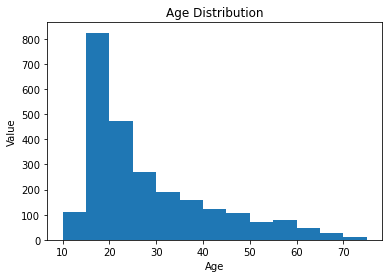

In [36]:
plt.hist(dataset["age"],bins = [10,15,20,25,30,35,40,45,50,55,60,65,70,75]) #As we know that our age range is like 10 to 75 this is why we can declare bins like that.
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

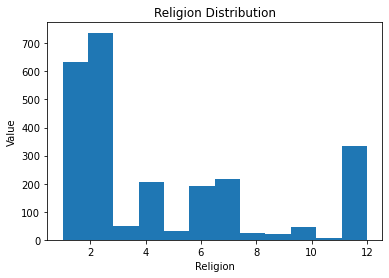

In [37]:
plt.hist(dataset["religion"],bins = 12) # We have 12 types of religion.
plt.title("Religion Distribution")
plt.xlabel("Religion")
plt.ylabel("Value")
plt.show()

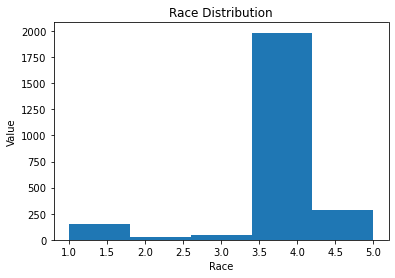

In [38]:
plt.hist(dataset["race"],bins = 5) # Our race feature has 5 types.
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Value")
plt.show()

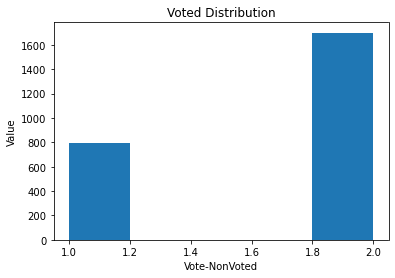

In [39]:
plt.hist(dataset["voted"],bins = 5)
plt.title("Voted Distribution")
plt.xlabel("Vote-NonVoted")
plt.ylabel("Value")
plt.show()

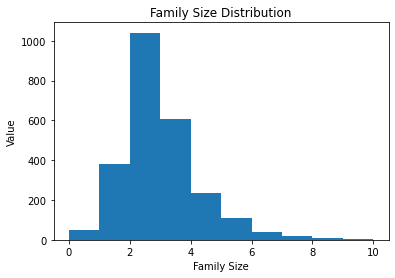

In [40]:
plt.hist(dataset["familysize"],bins = [0,1,2,3,4,5,6,7,8,9,10])
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Value")
plt.show()

In the next step, we can use histogram for analyze the TIPI values

TIPI1 Extraverted, enthusiastic.

TIPI2 Critical, quarrelsome.

TIPI3 Dependable, self-disciplined.

TIPI4 Anxious, easily upset.

TIPI5 Open to new experiences, complex.

TIPI6 Reserved, quiet.

TIPI7 Sympathetic, warm.

TIPI8 Disorganized, careless.

TIPI9 Calm, emotionally stable.

TIPI10 Conventional, uncreative.

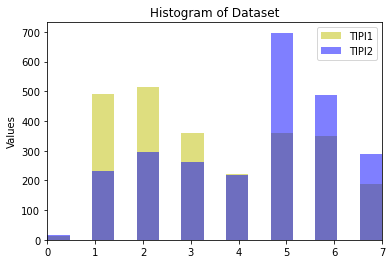

In [41]:
kwargs = dict(alpha=0.5, bins=15)

plt.hist(dataset.TIPI1, **kwargs, color='y', label='TIPI1')
plt.hist(dataset.TIPI2, **kwargs, color='b', label='TIPI2')
plt.gca().set(title='Histogram of Dataset', ylabel='Values')
plt.xlim(0,7)
plt.legend();

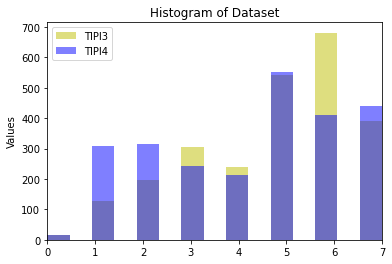

In [42]:
kwargs = dict(alpha=0.5, bins=15)

plt.hist(dataset.TIPI3, **kwargs, color='y', label='TIPI3')
plt.hist(dataset.TIPI4, **kwargs, color='b', label='TIPI4')
plt.gca().set(title='Histogram of Dataset', ylabel='Values')
plt.xlim(0,7)
plt.legend();

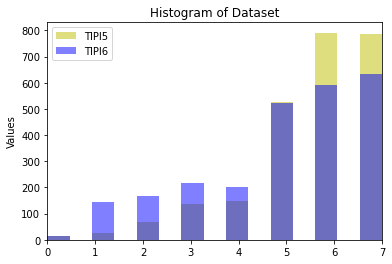

In [43]:
kwargs = dict(alpha=0.5, bins=15)

plt.hist(dataset.TIPI5, **kwargs, color='y', label='TIPI5')
plt.hist(dataset.TIPI6, **kwargs, color='b', label='TIPI6')
plt.gca().set(title='Histogram of Dataset', ylabel='Values')
plt.xlim(0,7)
plt.legend();

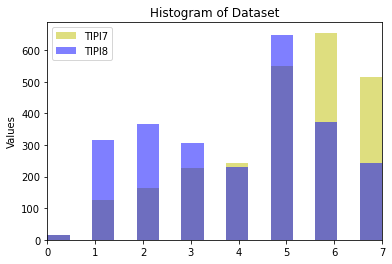

In [44]:
kwargs = dict(alpha=0.5, bins=15)

plt.hist(dataset.TIPI7, **kwargs, color='y', label='TIPI7')
plt.hist(dataset.TIPI8, **kwargs, color='b', label='TIPI8')
plt.gca().set(title='Histogram of Dataset', ylabel='Values')
plt.xlim(0,7)
plt.legend();

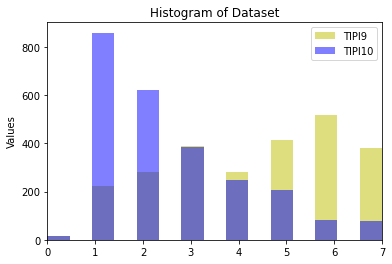

In [45]:
kwargs = dict(alpha=0.5, bins=15)

plt.hist(dataset.TIPI9, **kwargs, color='y', label='TIPI9')
plt.hist(dataset.TIPI10, **kwargs, color='b', label='TIPI10')
plt.gca().set(title='Histogram of Dataset', ylabel='Values')
plt.xlim(0,7)
plt.legend();

In [46]:
dataset.corr()["education"].sort_values() #In here we are checking the correlation education with the others and sort then we can use box blot with the lowest correlation features

voted         -0.289888
TIPI4         -0.199048
orientation   -0.174440
TIPI8         -0.173226
gender        -0.170675
                 ...   
VCL7           0.290495
VCL8           0.303233
married        0.306724
age            0.494728
education      1.000000
Name: education, Length: 71, dtype: float64

## Box Plot

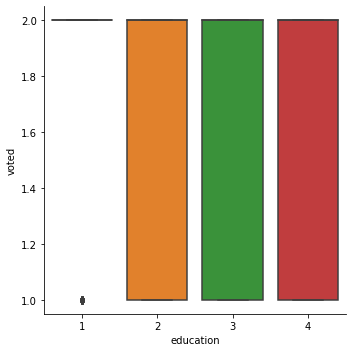

In [47]:
sbn.catplot(x = "education", y = "voted",kind = "box",data = dataset) #Also we can use box plot for analyze relationship between features

In [48]:
dataset.corr()["gender"].sort_values()

TIPI9         -0.189485
education     -0.170675
age           -0.168714
VCL13         -0.087015
TIPI2         -0.081750
                 ...   
Q3             0.140652
Q8             0.143343
TIPI4          0.264857
orientation    0.337745
gender         1.000000
Name: gender, Length: 71, dtype: float64

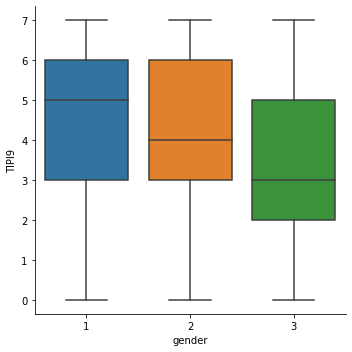

In [49]:
sbn.catplot(x = "gender", y = "TIPI9",kind = "box",data = dataset)

In [50]:
dataset.corr()["age"].sort_values()

voted         -0.236137
TIPI8         -0.223590
TIPI2         -0.218018
TIPI4         -0.217342
orientation   -0.216753
                 ...   
VCL11          0.269035
VCL7           0.333714
education      0.494728
married        0.625297
age            1.000000
Name: age, Length: 71, dtype: float64

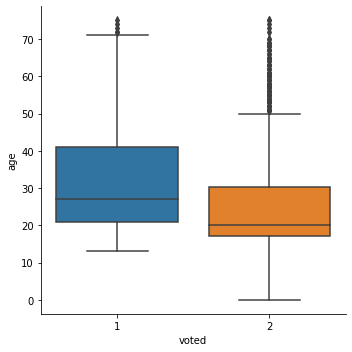

In [51]:
sbn.catplot(x = "voted", y = "age",kind = "box",data = dataset)

In [52]:
dataset.corr()["hand"].sort_values()

VCL4    -0.045434
E10     -0.033803
TIPI4   -0.033738
VCL16   -0.031086
TIPI2   -0.028090
           ...   
VCL7     0.080006
VCL6     0.096559
VCL12    0.118188
VCL9     0.184789
hand     1.000000
Name: hand, Length: 71, dtype: float64

## Bar Plot

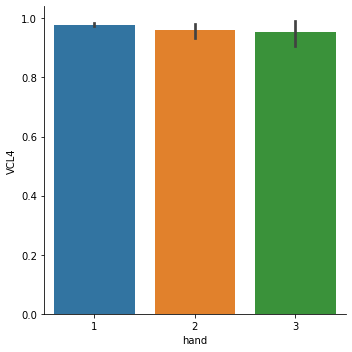

In [53]:
sbn.catplot(x = "hand", y = "VCL4",kind = "bar",data = dataset) #Bar plot is also using for visualization as you see.

In [54]:
dataset.corr()["married"].sort_values()

TIPI8         -0.187565
TIPI2         -0.169737
orientation   -0.164781
TIPI4         -0.153046
voted         -0.141434
                 ...   
TIPI3          0.156901
VCL7           0.170702
education      0.306724
age            0.625297
married        1.000000
Name: married, Length: 71, dtype: float64

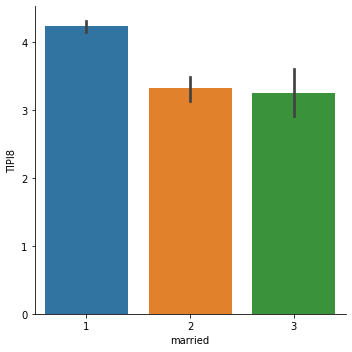

In [55]:
sbn.catplot(x = "married", y = "TIPI8",kind = "bar",data = dataset)

In [56]:
dataset.corr()["familysize"].sort_values()

urban        -0.068305
voted        -0.050230
engnat       -0.036875
TIPI4        -0.031917
E15          -0.028913
                ...   
TIPI1         0.069414
hand          0.078588
age           0.090396
married       0.101876
familysize    1.000000
Name: familysize, Length: 71, dtype: float64

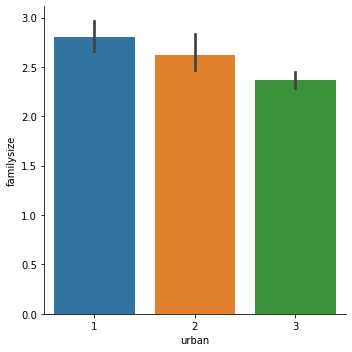

In [57]:
sbn.catplot(x = "urban", y = "familysize",kind = "bar",data = dataset)

Preprocessing phase has done...

In [58]:
from sklearn.model_selection import train_test_split

X = dataset.drop(labels = ["gender","major"],axis = 1) #In my dataset I want use age value as target so I have to split my values X and y.
#X has to be all numerical values except age so I can use drop function for remove age and major.
y = dataset.gender

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) # I used train test split function in here, and assign test_size as %30

## Algorithms

In [60]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = "hinge",shuffle=True,random_state=42)

sgd.fit(X_train,y_train)

y_predict_sgd = sgd.predict(X_test)

# Metric Results for Stochastic Gradient Descent
print("Stochastic Gradient Descent Model Score: ",sgd.score(X,y))
print("Stochastic Gradient Descent Mean Squared Error: ",mean_squared_error(y_test,y_predict_sgd))
print("Stochastic Gradient Descent Mean Absolute Error: ",mean_absolute_error(y_test,y_predict_sgd))
print("Stochastic Gradient Descent r2 Score: ",r2_score(y_test,y_predict_sgd))
print("Classification Report:\n ",classification_report(y_test,y_predict_sgd,digits = 2))

Stochastic Gradient Descent Model Score:  0.4725450901803607
Stochastic Gradient Descent Mean Squared Error:  0.6194926568758344
Stochastic Gradient Descent Mean Absolute Error:  0.5740987983978638
Stochastic Gradient Descent r2 Score:  -0.67969686424622
Classification Report:
                precision    recall  f1-score   support

           1       0.51      0.47      0.49       392
           2       0.39      0.49      0.44       312
           3       0.00      0.00      0.00        45

    accuracy                           0.45       749
   macro avg       0.30      0.32      0.31       749
weighted avg       0.43      0.45      0.44       749



C:\Users\cagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="gini")

dtc.fit(X_train,y_train)

y_predict_dtc = dtc.predict(X_test)

# Metric Results for Decision Tree Classifier
print("Decision Classifier Model Score: ",dtc.score(X,y))
print("Decision Classifier Mean Squared Error: ",mean_squared_error(y_test,y_predict_dtc))
print("Decision Classifier Mean Absolute Error: ",mean_absolute_error(y_test,y_predict_dtc))
print("Decision Tree Classifier r2 Score: ",r2_score(y_test,y_predict_dtc))
print("Classification Report:\n ",classification_report(y_test,y_predict_dtc,digits = 2))

Decision Classifier Model Score:  0.8597194388777555
Decision Classifier Mean Squared Error:  0.5393858477970628
Decision Classifier Mean Absolute Error:  0.49132176234979974
Decision Tree Classifier r2 Score:  -0.4624946835247261
Classification Report:
                precision    recall  f1-score   support

           1       0.63      0.57      0.60       392
           2       0.47      0.54      0.50       312
           3       0.17      0.13      0.15        45

    accuracy                           0.53       749
   macro avg       0.42      0.42      0.42       749
weighted avg       0.54      0.53      0.53       749



In [62]:
# K - Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,metric="euclidean")

knn.fit(X_train,y_train)

y_predict_knn = knn.predict(X_test)

# Metric Results for K-Nearest Neighbors
print("K-Nearest Neighbors Model Score: ",knn.score(X,y))
print("K-Nearest Neighbors Mean Squared Error: ",mean_squared_error(y_test,y_predict_knn))
print("K-Nearest Neighbors Mean Absolute Error: ",mean_absolute_error(y_test,y_predict_knn))
print("K-Nearest Neighbors r2 Score: ",r2_score(y_test,y_predict_knn))
print("Classification Report:\n ",classification_report(y_test,y_predict_knn,digits = 2))

K-Nearest Neighbors Model Score:  0.6424849699398798
K-Nearest Neighbors Mean Squared Error:  0.6435246995994659
K-Nearest Neighbors Mean Absolute Error:  0.5687583444592791
K-Nearest Neighbors r2 Score:  -0.7448575184626682
Classification Report:
                precision    recall  f1-score   support

           1       0.52      0.52      0.52       392
           2       0.42      0.47      0.44       312
           3       0.00      0.00      0.00        45

    accuracy                           0.47       749
   macro avg       0.31      0.33      0.32       749
weighted avg       0.45      0.47      0.46       749



In [63]:
# Ensemble - Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,criterion="gini")

rfc.fit(X_train,y_train)

y_predict_rfc = rfc.predict(X_test)

# Metric Results for Random Forest Regressor
print("Random Forest Regression Model Score: ",rfc.score(X,y))
print("Random Forest Regression Mean Squared Error: ",mean_squared_error(y_test,y_predict_rfc))
print("Random Forest Regression Mean Absolute Error: ",mean_absolute_error(y_test,y_predict_rfc))
print("Random Forest Regression r2 Score: ",r2_score(y_test,y_predict_rfc))
print("Classification Report:\n ",classification_report(y_test,y_predict_rfc,digits = 2))

Random Forest Regression Model Score:  0.8813627254509018
Random Forest Regression Mean Squared Error:  0.411214953271028
Random Forest Regression Mean Absolute Error:  0.40053404539385845
Random Forest Regression r2 Score:  -0.11497119437033576
Classification Report:
                precision    recall  f1-score   support

           1       0.69      0.65      0.66       392
           2       0.53      0.64      0.58       312
           3       0.00      0.00      0.00        45

    accuracy                           0.60       749
   macro avg       0.40      0.43      0.41       749
weighted avg       0.58      0.60      0.59       749



C:\Users\cagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best model score is in the Random Forest Regressor so we can use this algorithm

## Information Gain & Gini Index

In [64]:
def compute_impurity(feature, impurity_criterion):
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == "entropy":
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == "gini":
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError("Unknown impurity criterion")
        
    return(round(impurity, 3))

In [65]:
print("Gini Index: ",compute_impurity(dataset["gender"],"gini"))

Gini Index:  0.549


In [66]:
target_entropy = compute_impurity(dataset["gender"], "entropy")
target_gini = compute_impurity(dataset["gender"],"gini")
information_gain = target_entropy - target_gini
print("Information Gain: ",information_gain)

Information Gain:  0.701


## Similarity Metric Result

In [67]:
corr,_ = pearsonr(y_test,y_predict_rfc)
print("Pearson's Correlation: ",corr)

Pearson's Correlation:  0.3432057285233536


In [68]:
corr, _ = spearmanr(y_test,y_predict_rfc)
print("Spearman's Correlation: ",corr)

Spearman's Correlation:  0.33921673232276794


In [69]:
corr, _ = kendalltau(y_test, y_predict_rfc)
print("Kendall's Tau: ",corr)

Kendall's Tau:  0.33102417742638235
